In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import pyqt5
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score,precision_score

warnings.filterwarnings('ignore')

In [180]:
df = pd.read_excel('data_airline_reviews.xlsx')

In [181]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

## Data Cleaning

In [183]:
df.duplicated()

0         False
1         False
2          True
3         False
4          True
          ...  
131890    False
131891     True
131892    False
131893     True
131894    False
Length: 131895, dtype: bool

In [184]:
df.drop_duplicates(inplace=True)

In [185]:
df.head(n=3)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no


In [186]:
df.drop(axis=0,index=[0],inplace=True)
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [187]:
s = df.isnull().sum()

In [188]:
s

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

In [189]:
# how many rows null of each col percent wise of the total rows
nrows = df.shape[0]
np.round(np.divide(s,nrows)*100,decimals=2)

airline             0.00
overall             2.91
author              0.00
review_date         0.00
customer_review     0.00
aircraft           69.78
traveller_type     38.64
cabin               4.05
route              38.69
date_flown         38.82
seat_comfort        8.13
cabin_service       8.08
food_bev           20.99
entertainment      34.25
ground_service     39.25
value_for_money     3.03
recommended         2.32
dtype: float64

In [190]:
# around 70 percent null rows for this col
df.drop(axis=1,columns=['aircraft'],inplace=True)

In [191]:
# date flown is irrelevant
df.drop(axis=1,columns=['date_flown'],inplace=True)

In [192]:
df['route'].value_counts().head()

route
BKK to LHR               31
LHR to JFK               30
Vancouver to Toronto     28
LHR to BKK               27
Guangzhou to New York    26
Name: count, dtype: int64

Seeing route-wise doesn't make sense as no route is inherently bad or good right!
Let's see the airlines and the count of routes they operate on 
We will further see the no of reviews per airline and check if it like some airline is kinda performing bad.

In [193]:
airline_routes = pd.Series()
for i in df['airline'].unique():
    count = df[df['airline']==i]['route'].unique().shape[0]
    airline_routes[i] = count
airline_routes

Turkish Airlines            843
Qatar Airways               777
Emirates                    830
Lufthansa                   691
KLM Royal Dutch Airlines    484
                           ... 
Thai Smile Airways           36
Gulf Air                     82
Kuwait Airways              105
WOW air                     371
Ukraine International       190
Length: 81, dtype: int64

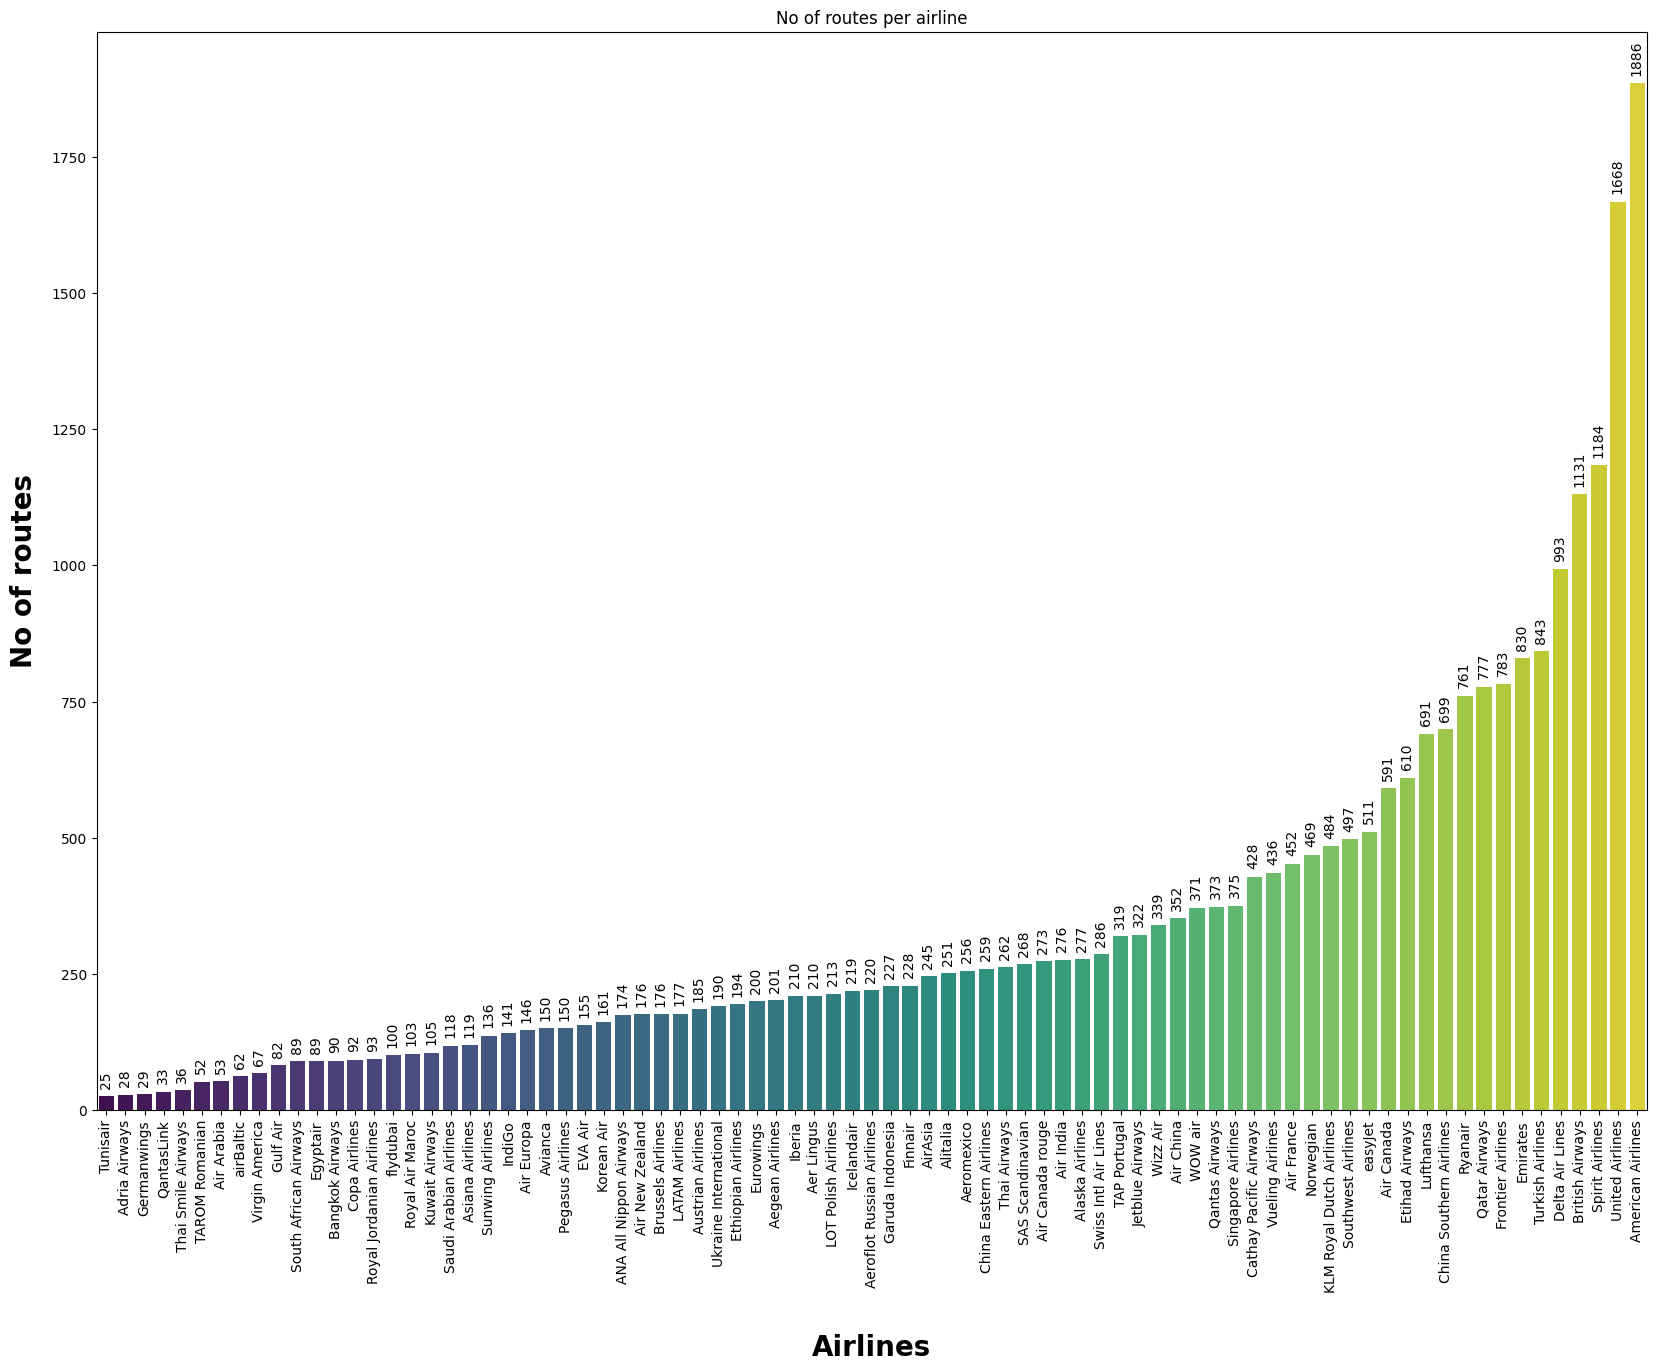

In [194]:
plt.figure(figsize=(20,14))
airline_routes.sort_values(inplace=True)
sorted_index = airline_routes.index
ax = sns.barplot(x=airline_routes.index,y=airline_routes,palette='viridis')
ax.tick_params(axis='x',rotation=90)
ax.set_xlabel("Airlines",labelpad=30,fontweight = 'bold',fontsize=20)
ax.set_ylabel("No of routes",fontweight='bold',fontsize=20,labelpad=10)
ax.set_title("No of routes per airline")
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x(),height+20,s=f'{np.int64(height)}',rotation=90)

plt.savefig('routes_per_airline.png',dpi=500)

A quick insight is the major operators in the field. Big airlines will normally have a lot of reviews and there is possibility of many yeses and noes . One implication I can think of is that small airlines with few reviews and routes can have more yeses than noes than the big ones but that doesn't altogether make the bigger ones bad than the smaller ones ( You see !)

Let's see the no of reviews on each airline

In [195]:
reviews_count = []
for i in sorted_index:
    reviews_count.append(df[df['airline']==i]['recommended'].count())
reviews_count

[np.int64(71),
 np.int64(83),
 np.int64(140),
 np.int64(102),
 np.int64(47),
 np.int64(132),
 np.int64(80),
 np.int64(178),
 np.int64(304),
 np.int64(266),
 np.int64(383),
 np.int64(324),
 np.int64(351),
 np.int64(211),
 np.int64(260),
 np.int64(200),
 np.int64(256),
 np.int64(265),
 np.int64(242),
 np.int64(432),
 np.int64(584),
 np.int64(262),
 np.int64(334),
 np.int64(298),
 np.int64(287),
 np.int64(511),
 np.int64(486),
 np.int64(461),
 np.int64(593),
 np.int64(406),
 np.int64(218),
 np.int64(496),
 np.int64(299),
 np.int64(410),
 np.int64(251),
 np.int64(521),
 np.int64(615),
 np.int64(702),
 np.int64(395),
 np.int64(503),
 np.int64(493),
 np.int64(733),
 np.int64(667),
 np.int64(621),
 np.int64(609),
 np.int64(424),
 np.int64(587),
 np.int64(776),
 np.int64(591),
 np.int64(1017),
 np.int64(680),
 np.int64(570),
 np.int64(694),
 np.int64(825),
 np.int64(629),
 np.int64(735),
 np.int64(656),
 np.int64(553),
 np.int64(1311),
 np.int64(1020),
 np.int64(1160),
 np.int64(942),
 np.int6

In [196]:
df[df['airline']=='Adria Airways']

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
124984,Adria Airways,8.0,M Jager,12th October 2018,âœ… Trip Verified | Ljubljana to Munich. The h...,Family Leisure,Economy Class,Ljubljana to Munich,4.0,4.0,3.0,NaN,5.0,5.0,yes
124986,Adria Airways,1.0,Giulia Rossi,5th October 2018,Not Verified | Zurich to Ljubljana. Very poor ...,Business,Economy Class,Zurich to Ljubljana,2.0,1.0,NaN,1.0,1.0,1.0,no
124988,Adria Airways,1.0,Galya Slavov,29th July 2018,âœ… Trip Verified | Vienna to Sofia. The fligh...,Family Leisure,Economy Class,Vienna to Sofia,4.0,1.0,1.0,NaN,4.0,1.0,no
124990,Adria Airways,2.0,Loic Jouan,19th July 2018,âœ… Trip Verified | We were traveling from Par...,Solo Leisure,Economy Class,Paris to Skopje via Ljubljana,3.0,3.0,NaN,NaN,3.0,2.0,no
124992,Adria Airways,2.0,P Gamirj,30th June 2018,âœ… Trip Verified | Ljubljana to Munich. Adria...,Business,Economy Class,Ljubljana to Munich,1.0,2.0,2.0,NaN,2.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125144,Adria Airways,NaN,Alex Stare,18th March 2004,Flew march 12/14 on JP from ZRH-LJU-ZRH. The f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
125146,Adria Airways,NaN,Alan McLean,1st November 2003,Round trip LGW - LJU in Business Class. Check-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
125148,Adria Airways,NaN,Andrew Proud,31st July 2003,In July 2003 I flew London (Gatwick)-Ljubljana...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
125150,Adria Airways,NaN,G Chew,6th December 2002,I have just returned from a long weekend in Lj...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


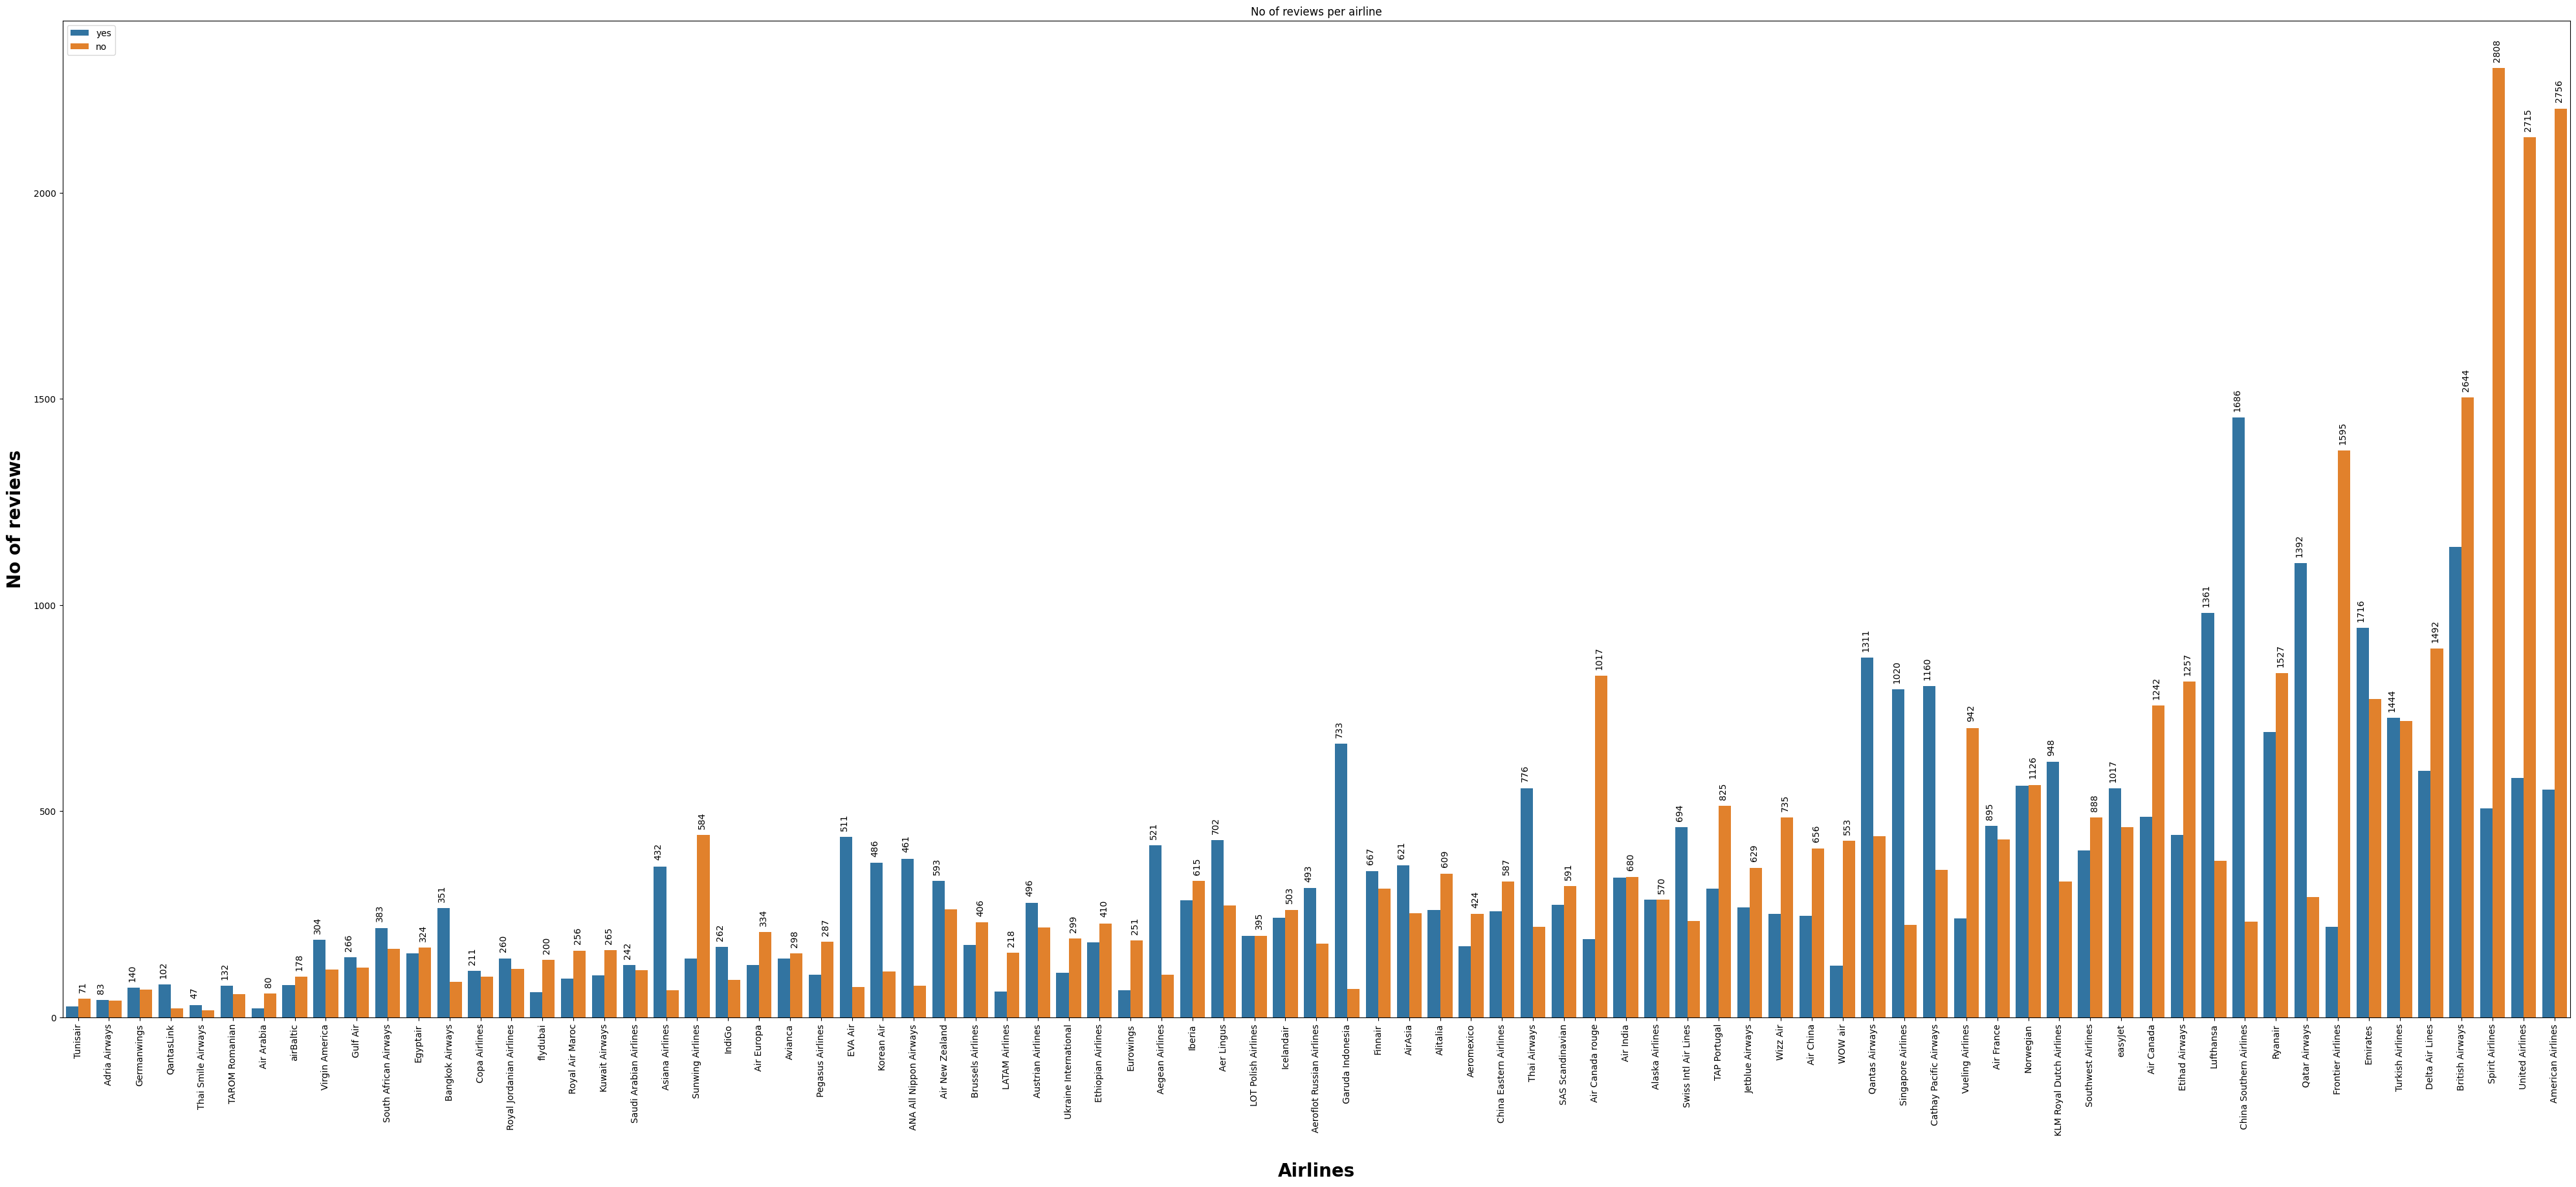

In [197]:
# plotting no of reviews per airline and yeses and noes
plt.clf()
plt.cla()
plt.close()
plt.figure(figsize=(50,20))
ax = sns.countplot(data=df,x='airline',hue='recommended',order=sorted_index)
for i in range(0,len(reviews_count)):
    if(ax.patches[i].get_height()>ax.patches[i+len(reviews_count)].get_height()):
        ax.text(ax.patches[i].get_x(),ax.patches[i].get_height()+20,s=f'{reviews_count[i]}',rotation=90)
    else:
        ax.text(ax.patches[i+len(reviews_count)].get_x(),ax.patches[i+len(reviews_count)].get_height()+20,s=f'{reviews_count[i]}',rotation=90)

ax.tick_params(axis='x',rotation=90)
ax.set_xlabel("Airlines",labelpad=30,fontweight = 'bold',fontsize=20)
ax.set_ylabel("No of reviews",fontweight='bold',fontsize=20,labelpad=10)
ax.set_title("No of reviews per airline")
ax.legend(loc='upper left')
plt.savefig('reviews_per_airline.png',dpi=500)
# plt.show()

Big airlines operating on lot of routes are having a lot noes. What I can think of is :-

1.) discomfort is experienced by a lot of passengers therefore proportionally a lot of noes
2.) smaller airlines can spend capital on few routes while bigger ones have to manage the capital on lot of routes
therefore differnet types of services and their supplied levels can vary between two kinds of airlines

Now I am going to drop the airline col because it is the type of service they provide that matters right! . Also , review_date , customer_review , route ,author would also be dropped

In [198]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'traveller_type', 'cabin', 'route', 'seat_comfort', 'cabin_service',
       'food_bev', 'entertainment', 'ground_service', 'value_for_money',
       'recommended'],
      dtype='object')

In [199]:
df.drop(axis=1,columns=['airline','author','review_date','customer_review','route'],inplace=True)

Let's anaylze two object columns : traveller_type and cabin

<Axes: xlabel='traveller_type', ylabel='count'>

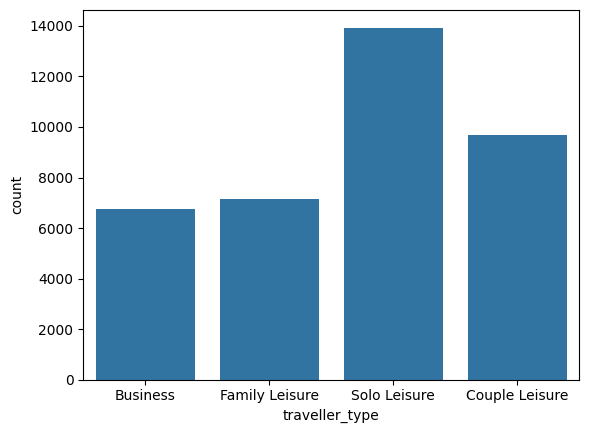

In [200]:
sns.countplot(data=df,x='traveller_type')

<Axes: xlabel='cabin', ylabel='count'>

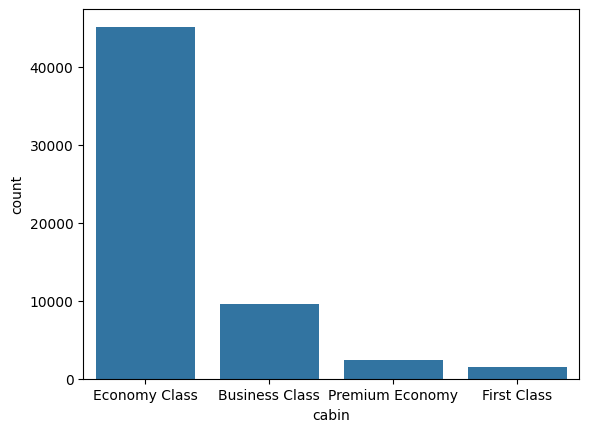

In [201]:
sns.countplot(data=df,x='cabin')

We will use KNN imputation for traveller_type as it has more than 30% null values but we can do probability wise random filling for cabin column . I have selected only top 2 categories in cabin for random filling

In [202]:
eco_count = df['cabin'].value_counts()[0]
business_count = df['cabin'].value_counts()[1]
economy_p = eco_count/(business_count+eco_count)
business_p = business_count/(business_count+eco_count)
print(economy_p , business_p)

0.8248753675060718 0.17512463249392815


In [203]:
np.random.choice(['e','b'],size=50,p=[economy_p,business_p])

array(['e', 'e', 'e', 'e', 'e', 'e', 'e', 'b', 'b', 'e', 'e', 'b', 'e',
       'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e',
       'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e',
       'e', 'b', 'e', 'e', 'e', 'e', 'b', 'e', 'e', 'e', 'b'], dtype='<U1')

In [204]:
df['cabin'].unique()

array(['Economy Class', 'Business Class', nan, 'Premium Economy',
       'First Class'], dtype=object)

In [205]:
# could have used fillna()
df['cabin'] = df['cabin'].apply(lambda cabin:np.random.choice(['Economy Class','Business Class'],p=[economy_p,business_p]) if pd.isnull(cabin) else cabin)

'seat_comfort' has distributed values therefore filling with random choice

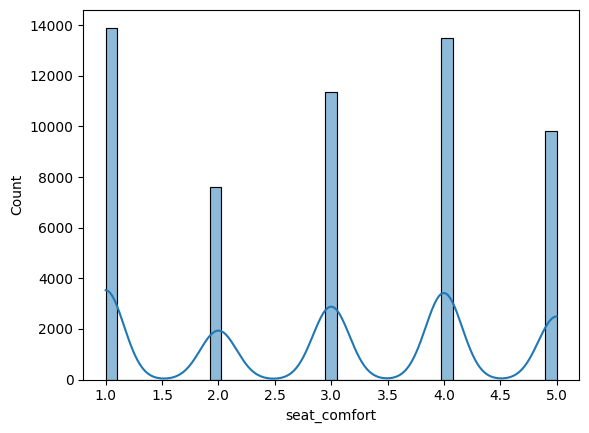

In [206]:
ax =sns.histplot(data=df,x='seat_comfort',kde=True)

In [207]:
seat_comf_value_counts = df['seat_comfort'].value_counts()

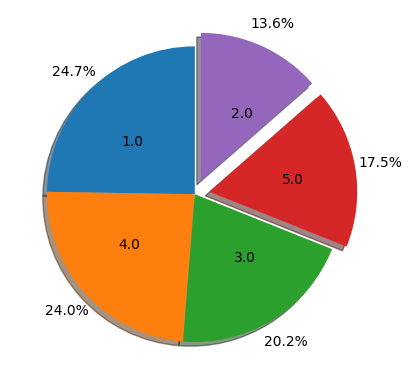

In [208]:
plt.pie(x=seat_comf_value_counts.values,labels=seat_comf_value_counts.index,autopct='%1.1f%%',pctdistance=1.17,labeldistance=0.5,explode=[0,0,0,0.1,0.1],shadow=True,startangle=90);

In [209]:
df['seat_comfort'].fillna(np.random.choice(df['seat_comfort'].unique()),inplace=True)

In [210]:
df.isnull().sum()

overall             1782
traveller_type     23643
cabin                  0
seat_comfort           0
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

just seeing how overall and value_for_money goes together, we'll see how we will impute missing values in them

In [211]:
df['overall'].corr(df['recommended'].replace({'yes':1,'no':0}))

np.float64(0.898805585748241)

In [212]:
df['value_for_money'].corr(df['recommended'].replace({'yes':1,'no':0}))

np.float64(0.8397285636412024)

In [213]:
df.corr(numeric_only=True).iloc[1:6,[0,6]]

,overall,value_for_money
seat_comfort,0.715160,0.720477
cabin_service,0.810469,0.752171
food_bev,0.784311,0.736136
entertainment,0.688582,0.648866
ground_service,0.846205,0.794744


Now, analyzing 'cabin_service'

<Axes: xlabel='cabin_service', ylabel='count'>

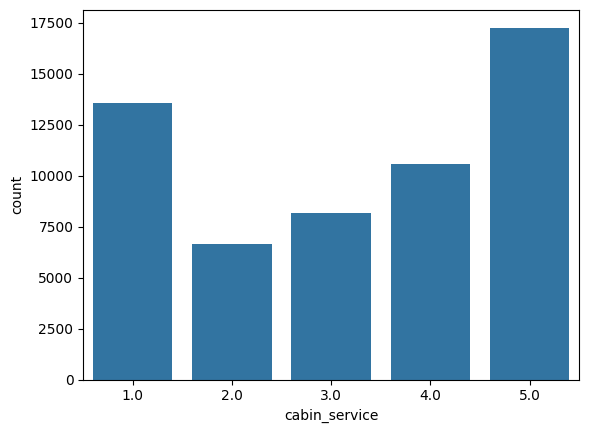

In [214]:
# cabin service
sns.countplot(data=df,x='cabin_service')

In [215]:
cabin_service_val_counts = df['cabin_service'].value_counts()

In [216]:
cabin_service_val_counts

cabin_service
5.0    17267
1.0    13577
4.0    10553
3.0     8171
2.0     6672
Name: count, dtype: int64

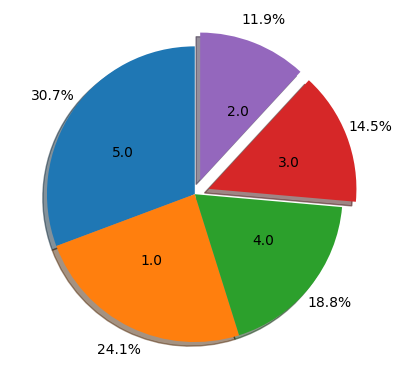

In [217]:
plt.pie(x=cabin_service_val_counts.values,labels=cabin_service_val_counts.index,autopct='%1.1f%%',pctdistance=1.17,labeldistance=0.5,explode=[0,0,0,0.1,0.1],shadow=True,startangle=90);

In [218]:
prob_cabin_service= [x/cabin_service_val_counts.sum() for x in cabin_service_val_counts]
df['cabin_service'].fillna(np.random.choice(cabin_service_val_counts.index,p=prob_cabin_service),inplace=True)

'cabin_service' is now completed

<Axes: >

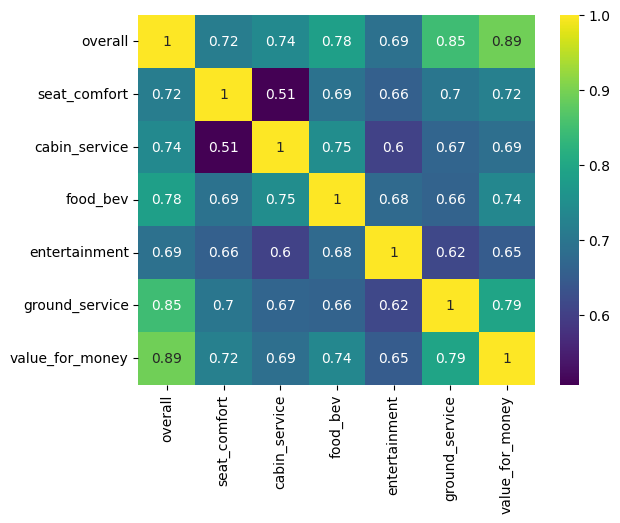

In [219]:
sns.heatmap(df.corr(numeric_only=True),cmap='viridis',annot=True)

Drop the rows that have target values as nulls. Because it's funny because if you were to impute them then what is the need of training a model . I mean it is kinda circular or "doing on your own self"

In [220]:
df.dropna(axis=0,subset=['recommended'],inplace=True)

In [221]:
df.isnull().sum()

overall             1764
traveller_type     22222
cabin                  0
seat_comfort           0
cabin_service          0
food_bev           11420
entertainment      19531
ground_service     22592
value_for_money      434
recommended            0
dtype: int64

Next Plan is that overall and value_for_money are highly correlated as expected and this overall field thru heatmap is seen to be correlated well with others so we will fill in others once we get overall field fixed. But before that since value_for_money is both having less nulls and related with overall , we can impute it first. Now we have at hand cabin, cabin_service, seat_comfort. Let's see if they are good to predict value_for_money (though for the later two heatmap tells us too)

In [222]:
df['cabin'].unique()

array(['Economy Class', 'Business Class', 'Premium Economy',
       'First Class'], dtype=object)

In [223]:
df['value_for_money'].corr(df['cabin'].replace({'Economy Class':1, 'Business Class':3, 'Premium Economy':2,
       'First Class':4}))

np.float64(0.15418517330948547)

In [224]:
df['recommended'].replace({"yes":1,"no":0}).corr(df['cabin'].replace({'Economy Class':1, 'Business Class':3, 'Premium Economy':2,
       'First Class':4}))

np.float64(0.1689646554049127)

<Axes: xlabel='cabin', ylabel='count'>

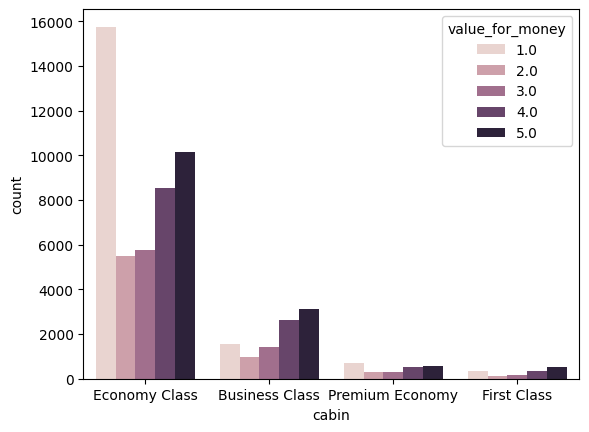

In [225]:
sns.countplot(data=df,x='cabin',hue='value_for_money')

Like we can drop 'cabin' for its low correlation with value_for_money ( which is very highly related with recommended var) but i would still wanna keep it . But one thing is sure there is no need to include 'cabin' in imputation of 'value_for_money'

<Axes: xlabel='seat_comfort', ylabel='value_for_money'>

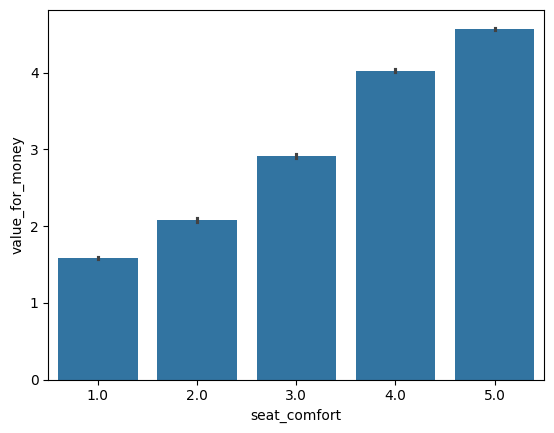

In [226]:
sns.barplot(data=df,x='seat_comfort',y='value_for_money')

<Axes: xlabel='cabin_service', ylabel='value_for_money'>

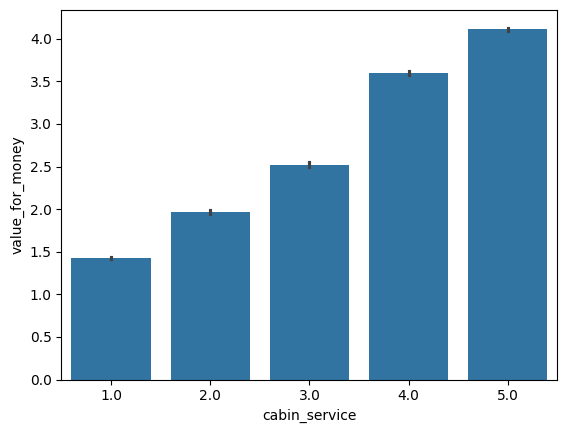

In [227]:
sns.barplot(data=df,x='cabin_service',y='value_for_money')

we will use these two features to impute 'value_for_money' then these 3 to impute 'overall' then combinely these 4 to fill food_bev , in this way sequentially.

# Following is for knowledge's sake

I thought of creating a custom sequential imputer fitted in a pipeline to apply KNN imputation only to the training fold but 
that's way too much caring. I can simply impute missing values with the help of all the data and then normally do model folds plit and training

Creating custom imputer

In [228]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.base import BaseEstimator,TransformerMixin

class SequentialImputer(BaseEstimator,TransformerMixin):
    def __init__(self,start_cols,seq_cols):
        self.start_cols = start_cols
        self.seq_cols = seq_cols

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        imputer = KNNImputer(n_neighbors=5, weights='distance')
        for curr_col in self.seq_cols:
            self.start_cols.append(curr_col)
            X[self.start_cols]=imputer.fit_transform(X[self.start_cols])
            X[curr_col] = np.round(X[curr_col])
            self.seq_cols.remove(curr_col)
        return X
        

In [229]:
# new_df = df.copy()

In [230]:
imputer = SequentialImputer(start_cols=['seat_comfort','cabin_service'],seq_cols=['value_for_money'])
# new_df = imputer.fit_transform(new_df)

Imputing different columns

In [242]:
start_cols=['seat_comfort','cabin_service']
seq_cols=['value_for_money','overall','food_bev','ground_service','entertainment']
imputer = KNNImputer(n_neighbors=5, weights='distance')
for curr_col in seq_cols:
    start_cols.append(curr_col)
    df[start_cols]=imputer.fit_transform(df[start_cols])
    df[curr_col] = np.round(df[curr_col])

In [249]:
df['traveller_type'] = df['traveller_type'].map({'Business':1,'Family Leisure':2,'Solo Leisure':3,'Couple Leisure':4})

In [250]:
start_cols

['seat_comfort',
 'cabin_service',
 'value_for_money',
 'overall',
 'food_bev',
 'ground_service',
 'entertainment']

In [251]:
start_cols.append('traveller_type')
df[start_cols]=imputer.fit_transform(df[start_cols])
df[curr_col] = np.round(df[curr_col])

In [254]:
df['traveller_type'] = df['traveller_type'].map({1:'Business',2:'Family Leisure',3:'Solo Leisure',4:'Couple Leisure'})

#### Okay so finally all this process is done no nulls 

In [264]:
df.columns

Index(['overall', 'traveller_type', 'cabin', 'seat_comfort', 'cabin_service',
       'food_bev', 'entertainment', 'ground_service', 'value_for_money',
       'recommended'],
      dtype='object')

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = df[['overall','value_for_money','food_bev','entertainment','seat_comfort','cabin_service','ground_service']]
vif = pd.DataFrame()
vif['features'] = ['overall','value_for_money','food_bev','entertainment','seat_comfort','cabin_service','ground_service']
vif['vif'] = [variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]
vif

,features,vif
0,overall,19.699117
1,value_for_money,22.601723
2,food_bev,16.874396
3,entertainment,11.238370
4,seat_comfort,10.899379
5,cabin_service,12.266591
6,ground_service,16.846322


In [7]:
vif_data = df[['value_for_money','food_bev','entertainment','seat_comfort','cabin_service','ground_service']]
vif = pd.DataFrame()
vif['features'] = ['value_for_money','food_bev','entertainment','seat_comfort','cabin_service','ground_service']
vif['vif'] = [variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]
vif

,features,vif
0,value_for_money,18.215841
1,food_bev,16.509371
2,entertainment,11.237927
3,seat_comfort,10.899296
4,cabin_service,12.256985
5,ground_service,14.256952


high vif , overfitting is going to happen or something like that (keep in mind how to know overfitting has occurr)

In [13]:
df.drop(axis=1,columns=['overall'],inplace=True)

In [35]:
# Let's save it , so i don't need to re-run the whole notebook just in case
df = df.reset_index(drop=True) # else the irregular index will be written in csv
df.to_csv('fixed_data_airline_reviews.csv',index=False)

### Separating Dependent and Independent features

In [36]:
df

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...
59756,NaN,Economy Class,1.0,5.0,4.0,4.0,4.0,4.0,no
59757,NaN,Economy Class,1.0,5.0,4.0,4.0,4.0,4.0,no
59758,NaN,Business Class,1.0,5.0,4.0,4.0,4.0,4.0,no
59759,NaN,Business Class,1.0,5.0,4.0,4.0,4.0,4.0,no


In [4]:
y = df['recommended']
X = df.drop(axis=1,columns='recommended')

### Label Encoding

In [5]:
y=y.replace({'yes':1,'no':0})

### One hot encoding

In [6]:
X = pd.get_dummies(X,drop_first=True)

In [291]:
X

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,False,False,False,True,False,False
3,4.0,1.0,1.0,1.0,1.0,1.0,False,True,False,True,False,False
5,1.0,4.0,1.0,3.0,1.0,2.0,False,False,False,True,False,False
7,4.0,5.0,5.0,5.0,5.0,5.0,False,False,True,True,False,False
9,1.0,1.0,1.0,1.0,1.0,1.0,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
131886,1.0,5.0,4.0,4.0,4.0,4.0,False,False,False,True,False,False
131888,1.0,5.0,4.0,4.0,4.0,4.0,False,False,False,True,False,False
131890,1.0,5.0,4.0,4.0,4.0,4.0,False,False,False,False,False,False
131892,1.0,5.0,4.0,4.0,4.0,4.0,False,False,False,False,False,False


### Handling class imbalance

The Percentage of No labels of Target Variable is 52.0
The Percentage of Yes labels of Target Variable is 48.0


<Axes: xlabel='recommended', ylabel='count'>

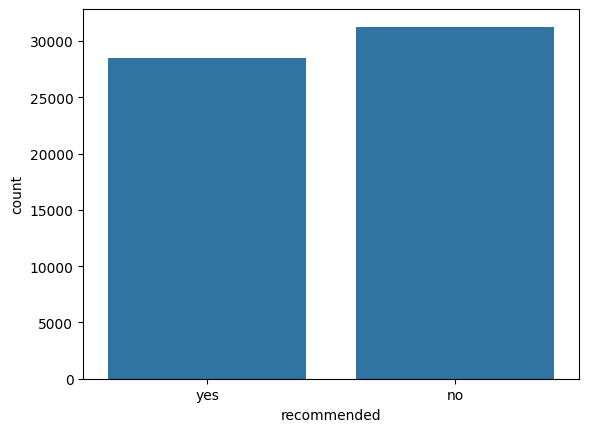

In [297]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))
sns.countplot(data=df,x=df['recommended'])

No need to handle class imbalance

### Train test split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
#shape of x_train and x_test
print(x_train.shape)
print(x_test.shape)

(44820, 14)
(14941, 14)


In [8]:
#shape of y_train and y_test
print(y_train.shape)
print(y_test.shape)

(44820,)
(14941,)


## Model Building

### 1. Logistic Regression

In [8]:
log_reg_model = LogisticRegression(max_iter=10000)
log_reg_model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [26]:
print(log_reg_model.score(x_train,y_train))
print(log_reg_model.score(x_test,y_test))

0.9556224899598393
0.9524128237735091


Not much difference in the training and testing scores so safe to say that overfitting has not occurr

In [9]:
y_pred_log_red = log_reg_model.predict(x_test)

In [13]:
reportLogReg = classification_report(y_test,y_pred_log_red)
print(reportLogReg)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7831
           1       0.95      0.95      0.95      7110

    accuracy                           0.95     14941
   macro avg       0.95      0.95      0.95     14941
weighted avg       0.95      0.95      0.95     14941



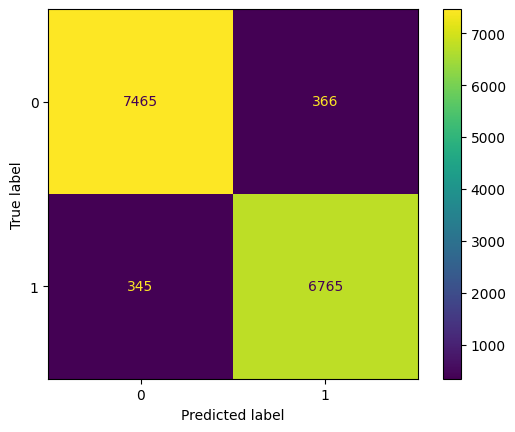

In [24]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_log_red))
cm.plot()

### 2. Decision Tree Classifier

In [27]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred_decision_tree = decision_tree_model.predict(x_test)

In [29]:
print(decision_tree_model.score(x_train,y_train))
print(decision_tree_model.score(x_test,y_test))

1.0
0.9353456930593669


that's a terrible overfitting

In [30]:
#pre-pruning
params = {
    'criterion':['gini','entropy','logloss'],
    'splitter' : ['best','random'],
    'max_depth':[5,6,7,8],
    'max_features':['auto','sqrt','log2'],
    "min_samples_split":[5,7]
}

In [31]:
decision_tree_cv = GridSearchCV(decision_tree_model,params,cv=5,scoring='accuracy')

In [32]:
decision_tree_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [5, 7],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [34]:
print(decision_tree_cv.best_params_)
print(decision_tree_cv.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 5, 'splitter': 'best'}
0.9510709504685408


In [35]:
print(decision_tree_cv.score(x_train,y_train))
print(decision_tree_cv.score(x_test,y_test))

0.9507809013833111
0.944448162773576


In [36]:
y_pred_decision_tree_cv = decision_tree_cv.predict(x_test)

In [37]:
clf_decision_tree_cv = classification_report(y_test,y_pred_decision_tree_cv)
print(clf_decision_tree_cv)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7831
           1       0.94      0.94      0.94      7110

    accuracy                           0.94     14941
   macro avg       0.94      0.94      0.94     14941
weighted avg       0.94      0.94      0.94     14941



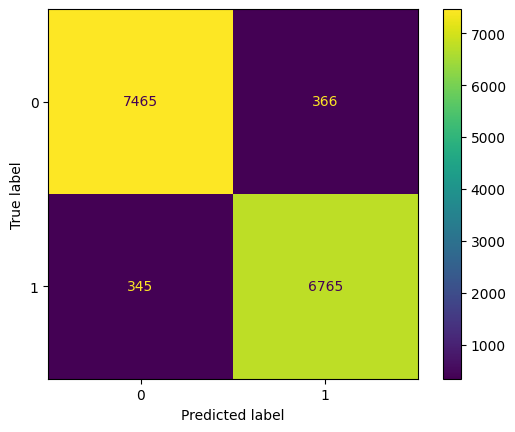

In [39]:
cm_decision_tree_cv = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_decision_tree_cv))
cm.plot()

### Random Forest Classifier

In [40]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_pred_rf = random_forest_classifier.predict(x_test)

In [42]:
#get train and test score
print(random_forest_classifier.score(x_train,y_train))
print(random_forest_classifier.score(x_test,y_test))

0.9999776885319054
0.9534167726390469


In [43]:
#report of random forest classifier
report_rf_classifier = classification_report(y_test,y_pred_rf)
print(report_rf_classifier)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7831
           1       0.96      0.95      0.95      7110

    accuracy                           0.95     14941
   macro avg       0.95      0.95      0.95     14941
weighted avg       0.95      0.95      0.95     14941



<Axes: >

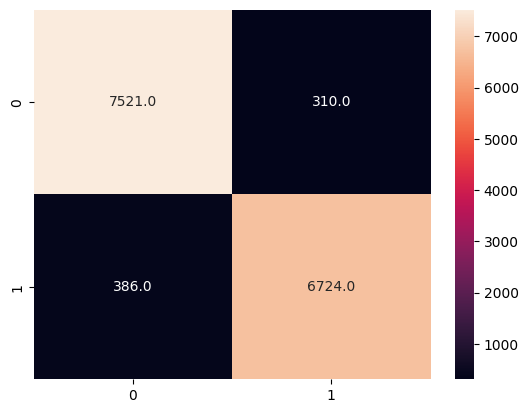

In [44]:
#confusion matrix 
con_mat_rf = confusion_matrix(y_test,y_pred_rf)

#plot confusion matrix
sns.heatmap(con_mat_rf,annot=True,fmt=".1f")

In [45]:
#prepruning
params_rf = {
    'criterion':['gini','entropy','logloss'],
    'max_depth': [2,3,5,7,10],
    'min_samples_leaf': [5,7,10],
    "min_samples_leaf":[2,3],
    'n_estimators': [10,25,30]
}

In [46]:
#hyper-parameter tuning
clf_rf = GridSearchCV(random_forest_classifier,params_rf,cv=5,scoring='accuracy')

In [47]:
# fit train data
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [2, 3, 5, 7, 10],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [10, 25, 30]},
             scoring='accuracy')

In [48]:
#predict result
y_pred_rf_hyper=clf_rf.predict(x_test)

In [49]:
#train and test score
print(clf_rf.score(x_train,y_train))
print(clf_rf.score(x_test,y_test))

0.9618473895582329
0.9532829127903085


In [50]:
#best parameters after hyper-parameter tuning
print(clf_rf.best_params_)
print(clf_rf.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 25}
0.955756358768407


In [51]:
#report of random forest classifier
report_rf_classifier_hyper = classification_report(y_test,y_pred_rf_hyper)
print(report_rf_classifier_hyper)


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7831
           1       0.95      0.95      0.95      7110

    accuracy                           0.95     14941
   macro avg       0.95      0.95      0.95     14941
weighted avg       0.95      0.95      0.95     14941



<Axes: >

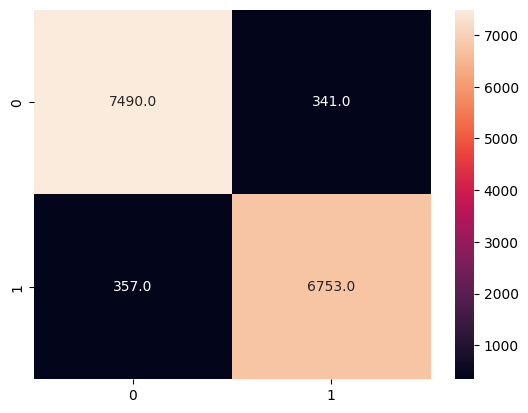

In [52]:
#confusion matrix
con_mat_rf_hyper = confusion_matrix(y_test,y_pred_rf_hyper)

#plot confusion matrix
sns.heatmap(con_mat_rf_hyper,annot=True,fmt='.1f')

### Deploy on gradeur